Caso não utilize o load_iris, importe o arquivo para o servidor do Colab com o seguinte trecho:

In [2]:
from google.colab import files
uploaded = files.upload()  # Isso abrirá uma caixa de diálogo para selecionar o arquivo

Saving Iris.csv to Iris.csv


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

Importa e divide o dataset em sets de treino e teste

In [4]:
iris = load_iris()
X = iris.data  # Atributos (features)
y = iris.target  # Rótulos (labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Primeiro teste com o critério Gini e com uma profundidade máxima de 3.

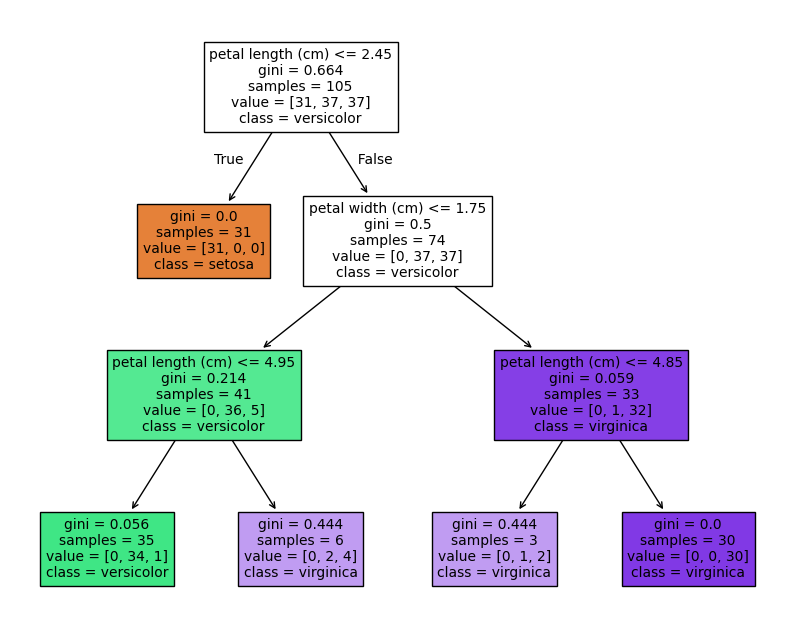

In [5]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

# Aqui foi copiado do GPT para visualizar o modelo
plt.figure(figsize=(10, 8))
tree.plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

Previsão nos dados de teste juntamente com o output do resultado

In [6]:
y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 1.0
Matriz de Confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:
# Teste com o diferentes profundidades no critério Gini
for depth in [2, 3, 5, 10]:
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Profundidade: {depth}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Teste com o 'entropy'
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)
print("Critério 'entropy'")
print("Acurácia:", accuracy_score(y_test, y_pred_entropy))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_entropy))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_entropy))

Profundidade: 2
Acurácia: 0.9777777777777777
Matriz de Confusão:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Profundidade: 3
Acurácia: 1.0
Matriz de Confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00 

**Melhor profundidade**

A profundidade ideal foi 5 com base na acurácia de 1.0 (100%). Esse resultado se deve ao equilíbrio entre a complexidade e a generalização (evitando o overfitting, cenário onde um modelo vicia seu treinamento à um dataset específico) e pois diversas profundidades foram testadas.

**Gini vs Entropy**

As profundidades do Gini resultaram na mesma acurácia (100%) e matriz de precisão. Com o critério entropy, no entanto, a acurácia foi de 97,78%.